This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns
374,375,2021-03-14 15:15:31.256000,3,375.372,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,21:21:46.628,180,0,0
375,376,2021-03-14 15:22:44.045000,3,407.390,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,21:29:31.435,180,0,0
376,377,2021-03-14 16:52:52.858000,3,391.138,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,22:59:23.996,180,0,0
377,378,2021-03-14 17:00:08.080000,3,214.337,event_only_floor_fall_1203_to_1403_2021,False,2,Infallible Laughing Penguin,1,23:03:42.417,85,0,0
378,379,2021-03-14 17:04:16.301000,3,314.871,event_only_floor_fall_1203_to_1403_2021,True,3,Infallible Laughing Penguin,1,23:09:31.172,180,0,0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
1302,376,1,round_floor_fall_event_only_02,81.221,81.225,True,4,20,0,0.0,35,0,gold,15,66,9.0,NaN
1303,376,2,round_floor_fall_event_only_final,139.153,139.157,False,2,60,0,3.0,0,0,NaN,9,0,1.0,NaN
1304,377,0,round_floor_fall_event_only_01,44.658,44.669,True,4,30,0,0.0,35,0,gold,20,75,14.0,NaN
1305,377,1,round_floor_fall_event_only_02,63.108,63.11,True,8,20,0,0.0,35,0,gold,14,66,9.0,NaN
1306,377,2,round_floor_fall_event_only_final,120.967,uncertain,False,3,60,0,3.0,0,0,NaN,9,0,0.0,NaN
1307,378,0,round_floor_fall_event_only_01,40.587,40.591,True,5,30,0,0.0,35,0,gold,20,75,14.0,NaN
1308,378,1,round_floor_fall_event_only_02,70.225,uncertain,False,11,20,0,3.0,0,0,NaN,14,66,0.0,NaN
1309,379,0,round_floor_fall_event_only_01,34.288,34.291,True,12,30,0,0.0,35,0,gold,20,75,15.0,NaN
1310,379,1,round_floor_fall_event_only_02,61.523,61.525,True,9,20,0,0.0,35,0,gold,14,66,9.0,NaN
1311,379,2,round_floor_fall_event_only_final,85.437,uncertain,False,8,60,0,3.0,0,0,NaN,9,0,0.0,NaN


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,106,95,89.622642,8.783019,7.747368,41.069832,14.903,41.075474,6505,1740,61.367925,16.415094,NaN,95,0,0,0.311321
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,95,78,82.105263,5.978947,4.769231,65.088449,48.504,65.094564,4630,1276,48.736842,13.431579,NaN,78,0,0,0.536842
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.000000,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_biggestfan,Big Fans,Race,60,60,100.000000,8.650000,8.650000,84.249717,55.290,177.517917,5135,2616,85.583333,43.600000,NaN,2,41,15,1.283333
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,50,47,94.000000,11.600000,10.680851,36.650574,26.872,36.668128,3145,474,62.900000,9.480000,NaN,47,0,0,0.180000
round_wall_guys,Wall Guys,Race,49,35,71.428571,9.591837,6.657143,78.899971,39.903,98.319486,4175,1712,85.204082,34.938776,NaN,2,10,17,2.122449
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,47,44,93.617021,10.659574,9.977273,33.680409,24.956,33.718886,2480,306,52.765957,6.510638,NaN,44,0,0,0.191489
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,44,37,84.090909,5.568182,4.162162,39.334973,28.399,39.326541,3935,266,89.431818,6.045455,NaN,37,0,0,0.477273
round_tunnel,Roll Out,Survival,39,32,82.051282,16.769231,13.312500,75.603000,22.657,75.612531,2140,1146,54.871795,29.384615,NaN,32,0,0,0.538462
round_dodge_fall,Fruit Chute,Race,38,30,78.947368,7.710526,6.033333,37.458133,30.552,45.967700,3535,1487,93.026316,39.131579,NaN,1,10,18,1.921053


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,379,359,94.722955
2,359,312,86.908078
3,231,182,78.787879
4,132,79,59.848485
5,4,1,25.000000
final,207,26,12.560386


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,262,19,162,400.320580,3.251908,273.759542,78.198473,61.832061,7.251908,29.134442,92.003502
total,379,27,209,461.362446,3.461741,300.633245,101.588391,55.145119,7.124011,48.571213,107.936029


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:411: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,185,17,81,585.468638,3.951351,374.000000,163.637838,43.783784,9.189189,30.086583,106.187939
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Other

In [8]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.0,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,37,2,5.405405,5.189189,1.0,191.121000,139.286,191.123000,3320,140,89.729730,3.783784,NaN,2,0,0,2.837838
round_floor_fall,Hex-A-Gone,Final,28,2,7.142857,4.035714,1.0,106.807000,92.734,106.818000,3440,946,122.857143,33.785714,NaN,2,0,0,2.785714
round_fall_mountain_hub_complete,Fall Mountain,Final,21,7,33.333333,3.857143,1.0,38.216286,35.305,35.566286,6605,1885,314.523810,89.761905,NaN,7,0,0,2.000000
round_jump_showdown,Jump Showdown,Final,21,3,14.285714,5.428571,1.0,183.094333,142.522,183.097333,3625,1094,172.619048,52.095238,NaN,3,0,0,2.571429
round_thin_ice,Thin Ice,Final,13,3,23.076923,3.846154,1.0,131.022333,105.602,131.025000,3105,809,238.846154,62.230769,NaN,3,0,0,2.307692
round_tunnel_final,Roll Off,Final,9,0,0.000000,4.444444,NaN,NaN,NaN,NaN,630,270,70.000000,30.000000,NaN,0,0,0,3.000000
round_royal_rumble,Royal Fumble,Final,3,1,33.333333,3.333333,1.0,92.772000,92.772,90.400000,905,233,301.666667,77.666667,NaN,1,0,0,2.000000


In [9]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 67
round_jump_showdown_jump_club_event_only_final    35
round_floor_fall                                  26
round_jump_showdown                               18
round_floor_fall_event_only_02                    17
round_wall_guys                                   14
round_fall_mountain_hub_complete                  14
round_floor_fall_event_only_01                    11
round_thin_ice                                    10
round_fall_ball_60_players                        10
round_tunnel_final                                 9
round_lava                                         8
round_dodge_fall                                   8
round_hoops_blockade_solo                          7
round_tunnel                                       7
round_jump_club_event_only_03                      7
round_hoops                                        7
round_tail_tag                                     6
round_match_fall                              

In [10]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN


# Visuals

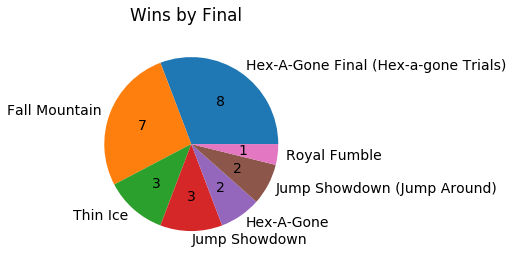

In [11]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        10
bronze        18
none           1
eliminated     8
Name: BadgeId, dtype: int64

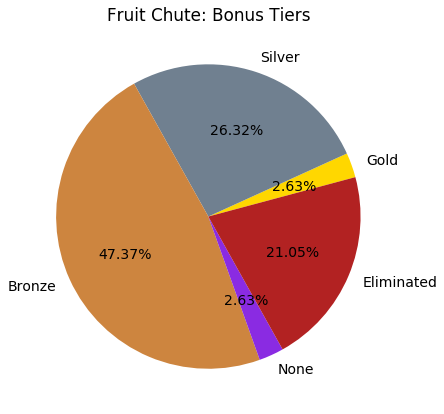

In [12]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                  15
event_only_floor_fall_2302_to_2502_2021     5
event_only_jump_club_0603_to_0803_2021      2
event_only_floor_fall_1203_to_1403_2021     2
event_only_floor_fall_0501_to_0701          1
Name: Game Mode, dtype: int64

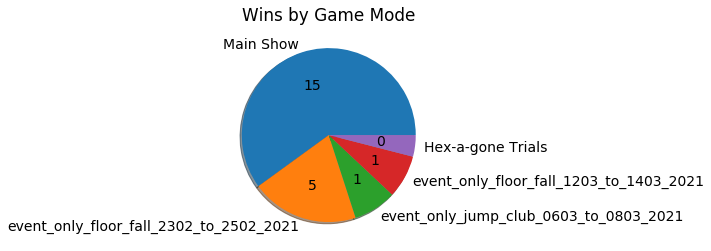

In [13]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [14]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                          185
event_only_jump_club_1202_to_1402_2021              44
event_only_floor_fall_1203_to_1403_2021             37
event_only_floor_fall_0501_to_0701                  37
event_only_floor_fall_2302_to_2502_2021             32
event_only_survival_1902_to_2202_2021               12
event_season_3_highlight_1512_to_1912                9
event_fan_favourites_0802_to_1102_2021               7
event_only_jump_club_0603_to_0803_2021               6
event_only_survival_2501_to_0102_2021                3
event_only_season_3_variation_0202_to_0702_2021      3
event_only_hard_mode_2111_to_2711                    2
event_fruit_basket_0801_to_1401                      1
event_only_races_any_final_1502_to_1802_2021         1
Name: Game Mode, dtype: int64

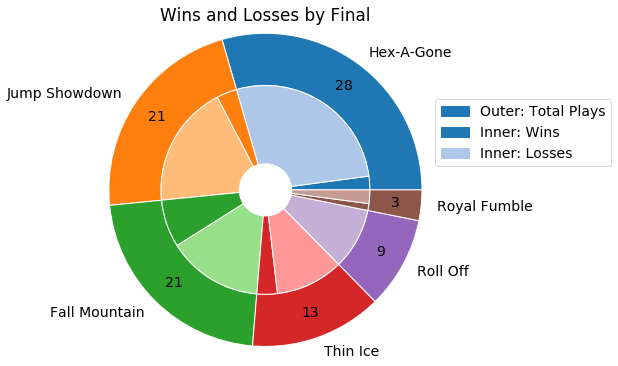

In [15]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,60,60,0
round_gauntlet_04,38,38,0
round_see_saw,37,37,0
round_gauntlet_01,32,30,2
round_gauntlet_02,25,24,1
round_chompchomp,25,24,1
round_door_dash,23,22,1
round_gauntlet_05,23,23,0
round_gauntlet_03,21,21,0


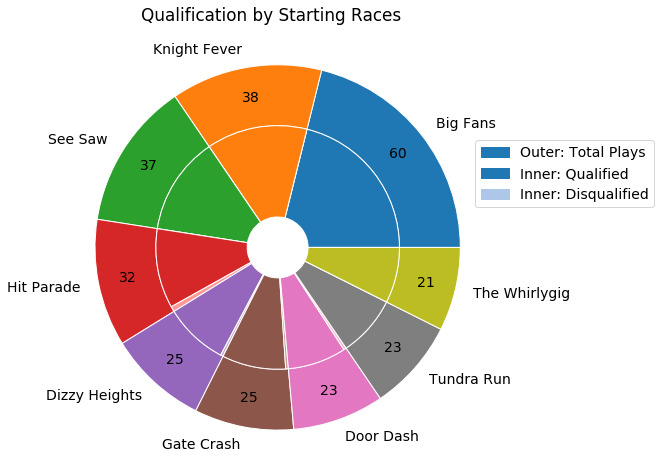

In [16]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

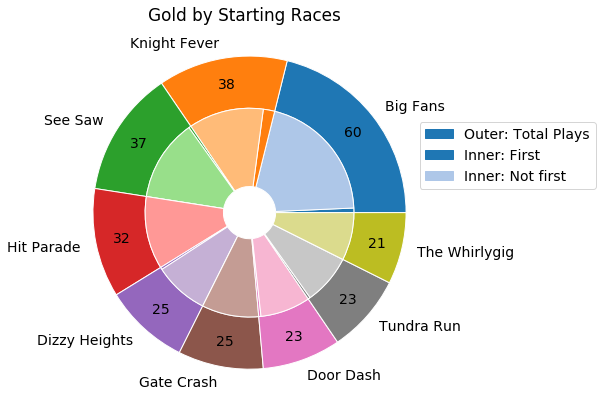

In [17]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

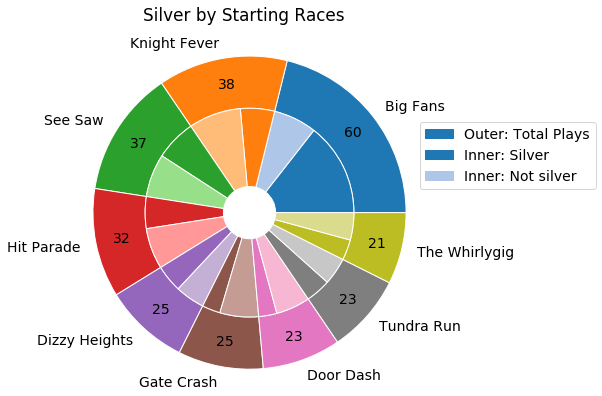

In [18]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

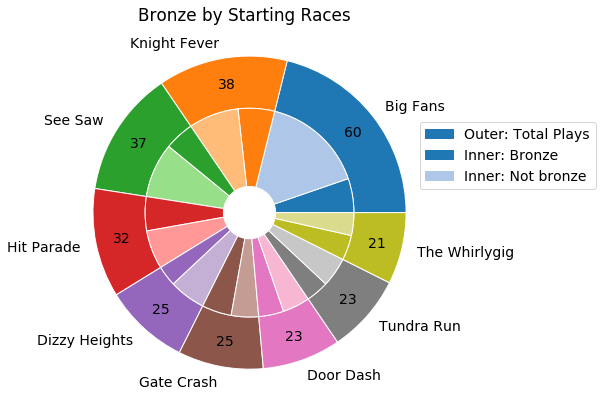

In [19]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);